## Notebook description:

When we look at by-layer domain means (See Fig2_carbon_balance in KEY_RESVIS), in the deep the salinity and carbon are lower than in the mid levels - this is likely because the deep doesn't contain salty/carbon rich JdF water. We are now going to look at the same thing, but use a mask just for the SOG. 

In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [4]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
#from mpl_toolkits.basemap import Basemap
#from scipy.io import loadmat
import pickle
from cmocean import cm
import warnings
import netCDF4 as nc

#by-layer mean extractor - in this folder
import extract_bylayer_mean as ebm
import importlib
importlib.reload(ebm)
from salishsea_tools import viz_tools

%matplotlib inline
warnings.simplefilter('ignore')



#### DEFINE REGION MASK

1.1363636363636362

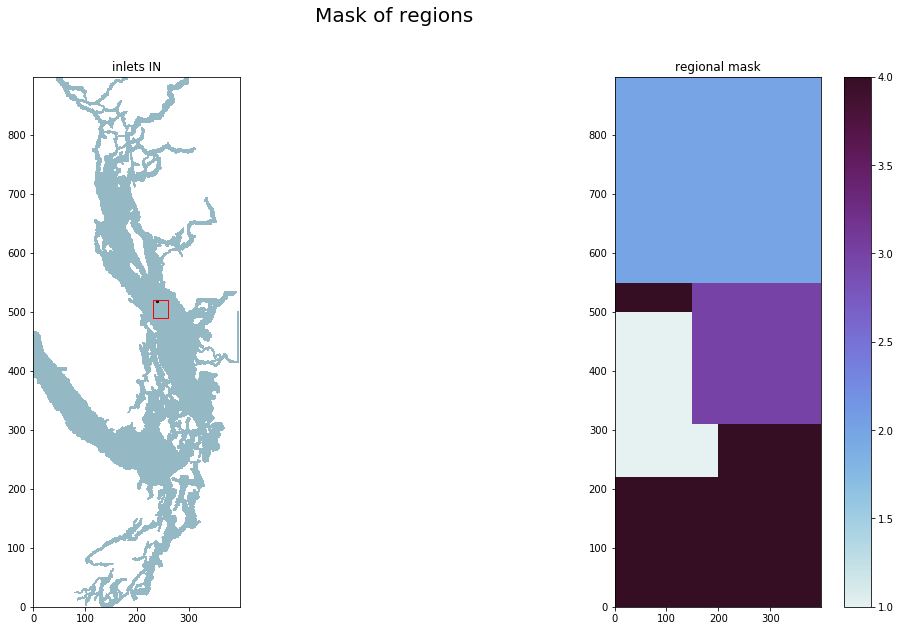

In [5]:
mask = np.zeros([898,398])
mask[:] = 4
for y in range(0,898):
    for x in range(0,398):
        #jdf
        if  (x <200) & (y>220) & (y<500) :
            mask[y,x] = 1
            #nsog
        if  (y >= 550) :
            mask[y,x] = 2
            # s sog
        if (x> 150) & (y>310) & (y<550) :
            mask[y,x] = 3





w = nc.Dataset('/data/tjarniko/results/hindcast.201905_dayavg_OmA-pH-pCO2/OmA_plus_20070104.nc')
pco2 = w['model_output']['pCO2'][:]
pco2[pco2>2e5] = np.nan
pco2[pco2<2000] = 500
fact = 1.5
fig = plt.figure(figsize=(12*fact,6.5*fact))

ax0 = fig.add_subplot(1,2,1)
#toba and bute

im = ax0.pcolormesh(pco2, cmap=cm.balance_r, vmin = 0, vmax = 800)
rect = Rectangle((230,490),30,30,linewidth=1,edgecolor='r',facecolor='none')
ax0.add_patch(rect)
plt.scatter(238, 518, s=20, c='black', marker=".")

ax0.set_title('inlets IN')
viz_tools.set_aspect(ax0)

ax2 = fig.add_subplot(1,2,2)
#toba and bute mask
#pco2[700:898,200:398] = np.nan
#pco2[550:700,255:398] = np.nan
#im = ax2.pcolormesh(pco2, cmap=cm.balance_r, vmin = 0, vmax = 800)
mesh = ax2.pcolormesh(mask[:,:], cmap=cm.dense)
fig.colorbar(mesh)
plt.suptitle('Mask of regions',fontsize=20)
ax2.set_title('regional mask')
viz_tools.set_aspect(ax2)

In [6]:
bath = nc.Dataset('/data/tjarniko/MEOPAR/grid/bathymetry_201702.nc')
tmax = np.max(bath['Bathymetry'])
# print(tmax)

wheremax = (np.where(bath['Bathymetry'][:]==428.0))
# print(np.shape(wheremax))
ys = wheremax[0]
xs =(wheremax[1])
# print(np.shape(ys))
print('one deep place is 518, 238')
print(bath['Bathymetry'][518,238])

one deep place is 518, 238
428.0


#### MEANS EXTRACTING CODE  - uses extract_bylayer_mean.py, which is in this folder
    
    Done on:
    BR1_DIC_means_inletsIN.pkl
    BR2_DIC_means_inletsIN.pkl
    BR3_ciliates_means_inletsIN.pkl
    BR3_ciliates_means_inletsOUT.pkl
    BR3_diatoms_means_inletsIN.pkl
    BR3_diatoms_means_inletsOUT.pkl
    BR3_DIC_means_inletsIN.pkl
    BR3_DIC_means_inletsOUT.pkl
    BR3_flagellates_means_inletsIN.pkl
    BR3_flagellates_means_inletsOUT.pkl
    PI3rr_DIC_means_inletsIN.pkl
    PI3rr_DIC_means_inletsOUT.pkl
           
    examples of use:
    # start = '2015-01-01' #start of timeperiod
    # end = '2015-12-31' #end of timeperiod (typically a year)
    # ftype = 'carp' #type of model result .nc 
    # sdir = '/NOT_MAIN_ANALYSIS/BR_1st_2015' #where under directory tree do we find ncs 
    # inletmask = False #are we masking out Toba/Bute/Jervis?
    # varname = 'dissolved_inorganic_carbon' #name of variable
    # fname = 'BR1_DIC_means_inletsIN' #name of resulting pkl 
    # ebm.extractor(start, end, ftype, sdir, varname, fname,  inletmask)
    

In [8]:
import extract_bylayer_mean_SOGMASK as ebm_sog
importlib.reload(ebm_sog)
import extract_bylayer_mean_BOXMASK as ebm_box
importlib.reload(ebm_box)
import extract_bylayer_mean_dsmask as ebm_ds
importlib.reload(ebm_box)
#examples of use:

start = '2015-01-01' #start of timeperiod
end = '2015-12-31' #end of timeperiod (typically a year)
ftype = 'grid_T' #type of model result .nc 
sdir = '/MAIN/BR_3rd_2015' #where under directory tree do we find ncs 
#sogmask = 3 #which regionare we doing this for
varname = 'vosaline' #name of variable
fname = 'BR3_sal_means_BOX' #name of resulting pkl 
ebm_box.extractor(start, end, ftype, sdir, varname, fname)

start = '2015-01-01' #start of timeperiod
end = '2015-12-31' #end of timeperiod (typically a year)
ftype = 'grid_T' #type of model result .nc 
sdir = '/PILA3_rerun/PI3' #where under directory tree do we find ncs 
#sogmask = 3 #which regionare we doing this for
varname = 'vosaline' #name of variable
fname = 'PI3rr_sal_means_BOX' #name of resulting pkl 
ebm_box.extractor(start, end, ftype, sdir, varname, fname)


start = '2015-01-01' #start of timeperiod
end = '2015-12-31' #end of timeperiod (typically a year)
ftype = 'grid_T' #type of model result .nc 
sdir = '/MAIN/BR_3rd_2015' #where under directory tree do we find ncs 
#sogmask = 3 #which regionare we doing this for
varname = 'vosaline' #name of variable
fname = 'BR3_sal_means_DS' #name of resulting pkl 
ebm_ds.extractor(start, end, ftype, sdir, varname, fname)

start = '2015-01-01' #start of timeperiod
end = '2015-12-31' #end of timeperiod (typically a year)
ftype = 'grid_T' #type of model result .nc 
sdir = '/PILA3_rerun/PI3' #where under directory tree do we find ncs 
#sogmask = 3 #which regionare we doing this for
varname = 'vosaline' #name of variable
fname = 'PI3rr_sal_means_DS' #name of resulting pkl 
ebm_ds.extractor(start, end, ftype, sdir, varname, fname)

0
50
100
150
200
250
300
350
done making nclen
/data/tjarniko/results/BASERUN_EXP//MAIN/BR_3rd_2015/ncs/SKOG_1d_20150101_20150130_grid_T_20150101-20150101.nc
shape of dataset is
(1, 40, 898, 398)
/data/tjarniko/results/BASERUN_EXP//MAIN/BR_3rd_2015/ncs/SKOG_1d_20150131_20150301_grid_T_20150220-20150220.nc
/data/tjarniko/results/BASERUN_EXP//MAIN/BR_3rd_2015/ncs/SKOG_1d_20150401_20150430_grid_T_20150411-20150411.nc
/data/tjarniko/results/BASERUN_EXP//MAIN/BR_3rd_2015/ncs/SKOG_1d_20150531_20150629_grid_T_20150531-20150531.nc
/data/tjarniko/results/BASERUN_EXP//MAIN/BR_3rd_2015/ncs/SKOG_1d_20150630_20150729_grid_T_20150720-20150720.nc
/data/tjarniko/results/BASERUN_EXP//MAIN/BR_3rd_2015/ncs/SKOG_1d_20150829_20150927_grid_T_20150908-20150908.nc
/data/tjarniko/results/BASERUN_EXP//MAIN/BR_3rd_2015/ncs/SKOG_1d_20151028_20151126_grid_T_20151028-20151028.nc
/data/tjarniko/results/BASERUN_EXP//MAIN/BR_3rd_2015/ncs/SKOG_1d_20151127_20151231_grid_T_20151217-20151217.nc
0
50
100
150
200
250
300
35

#### LOAD PKLS OF ABOVE EXTRACTED QUANTITIES

In [11]:
#extract means for BR1-BR3, get fraser discharge
#var
#BR1_var = pickle.load(open('./pkls/BR1_sal_means_inletsIN.pkl' , 'rb')) 
#BR2_var = pickle.load(open('./pkls/BR2_sal_means_inletsIN.pkl' , 'rb')) 
BR3_var = pickle.load(open('./pkls/BR3_sal_means_inletsIN.pkl' , 'rb')) 
#PI3rr_var = pickle.load(open('./pkls/PI3rr_sal_means_inletsIN.pkl' , 'rb'))
#BR3_var_reg3 = pickle.load(open('./pkls/BR3_sal_means_region3.pkl', 'rb'))
#PI3rr_var_reg3 = pickle.load(open('./pkls/PI3rr_sal_means_region3.pkl', 'rb'))
BR3_var_BOX = pickle.load(open('./pkls/BR3_sal_means_BOX.pkl', 'rb'))
PI3rr_var_BOX = pickle.load(open('./pkls/PI3rr_sal_means_BOX.pkl', 'rb'))
BR3_var_DS = pickle.load(open('./pkls/BR3_sal_means_DS.pkl', 'rb'))
PI3rr_var_DS = pickle.load(open('./pkls/PI3rr_sal_means_DS.pkl', 'rb'))


#inlets out

#BR3_sal_var = pickle.load(open('./pkls/BR3_sal_means_inletsIN.pkl' , 'rb'))

Fraser_discharge = pickle.load(open('./pkls/Fraser_2015_year_runoff_m3_s.pkl', 'rb'))  

mesh = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
bath = nc.Dataset('/data/tjarniko/MEOPAR/grid/bathymetry_201702.nc')
depth = mesh['gdept_1d'][:]



#### LOOKING MORE CLOSELY AT LOWER LEVELS OF MODEL, WE SEE AN INVERSION OF THE CYCLE; IS THIS PRESENT WHEN WE DO THIS calculation for region 3?

Text(0.5, 1.0, 'By-layer domain mean salinity concentration - INLETS IN')

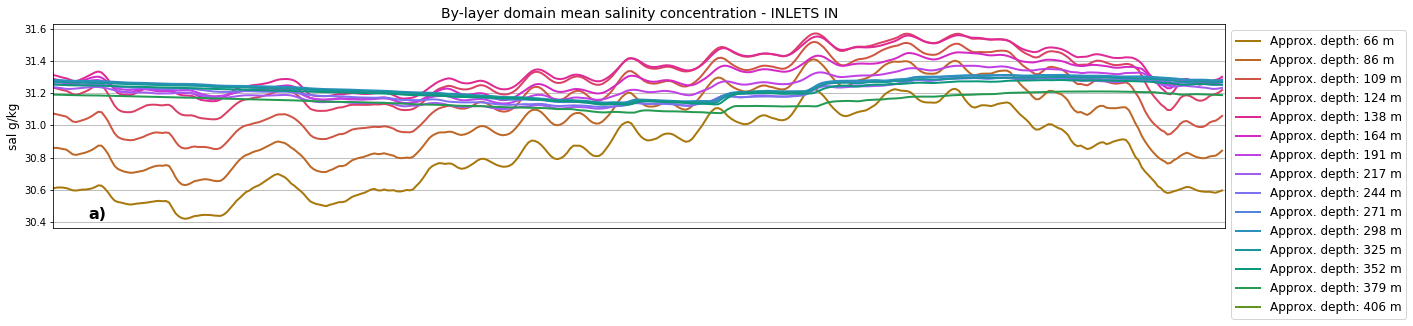

In [16]:
days_in = np.arange(0,365*1,1)
lw = 2
fs = 12
ts = 14
tmesh = nc.Dataset('//data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
fig = plt.figure(figsize=(14*fact, 8.5*fact))
depth = tmesh['e3t_0'][0,:,250,250]


ax1 = plt.subplot2grid((3,3), (0,0), colspan=3, rowspan=1)
tcm = cm.phase
for i in range(25,40):
    zdepth = np.sum(depth[0:i])
    if i%1 !=0: 
        ax1.plot(days_in,BR3_var[i,:],color = tcm(1.*(i-25)/16), linewidth = lw)
    if i%1 == 0:
        ax1.plot(days_in,BR3_var[i,:],color = tcm(1.*(i-25)/16),\
                label = 'Approx. depth: '+str(int(zdepth))+' m', linewidth = lw)
ax1.text(0.03, 0.03, 'a)', transform=ax1.transAxes, fontsize=16, fontweight='bold', va='bottom')
ax1.legend(bbox_to_anchor=[1.0,1.0], fontsize = fs)
plt.xlim([0,365*1])
plt.grid()
ax1.set_xticks([])
#ax1.set_xlabel('day of year', fontsize = fs)
ax1.set_ylabel('sal g/kg', fontsize = fs)
ax1.set_title('By-layer domain mean salinity concentration - INLETS IN', fontsize = ts)



#plt.tight_layout()

Text(0.5, 1.0, 'By-layer domain mean DIC concentration - only masked region 3')

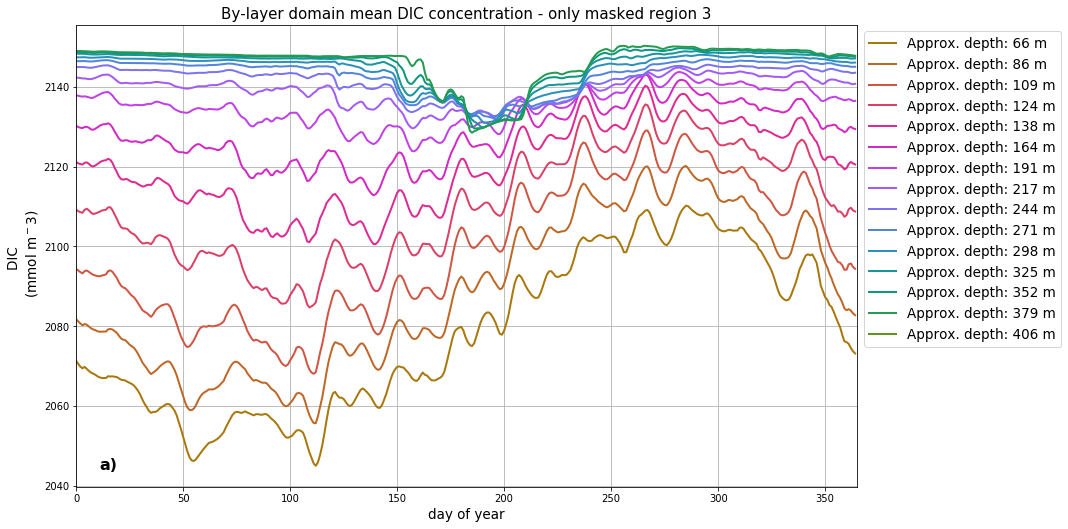

## what does this look like for just the region circumscribed by that box?

Text(0.5, 1.0, 'By-layer domain mean DIC concentration - only the box in plot 1')

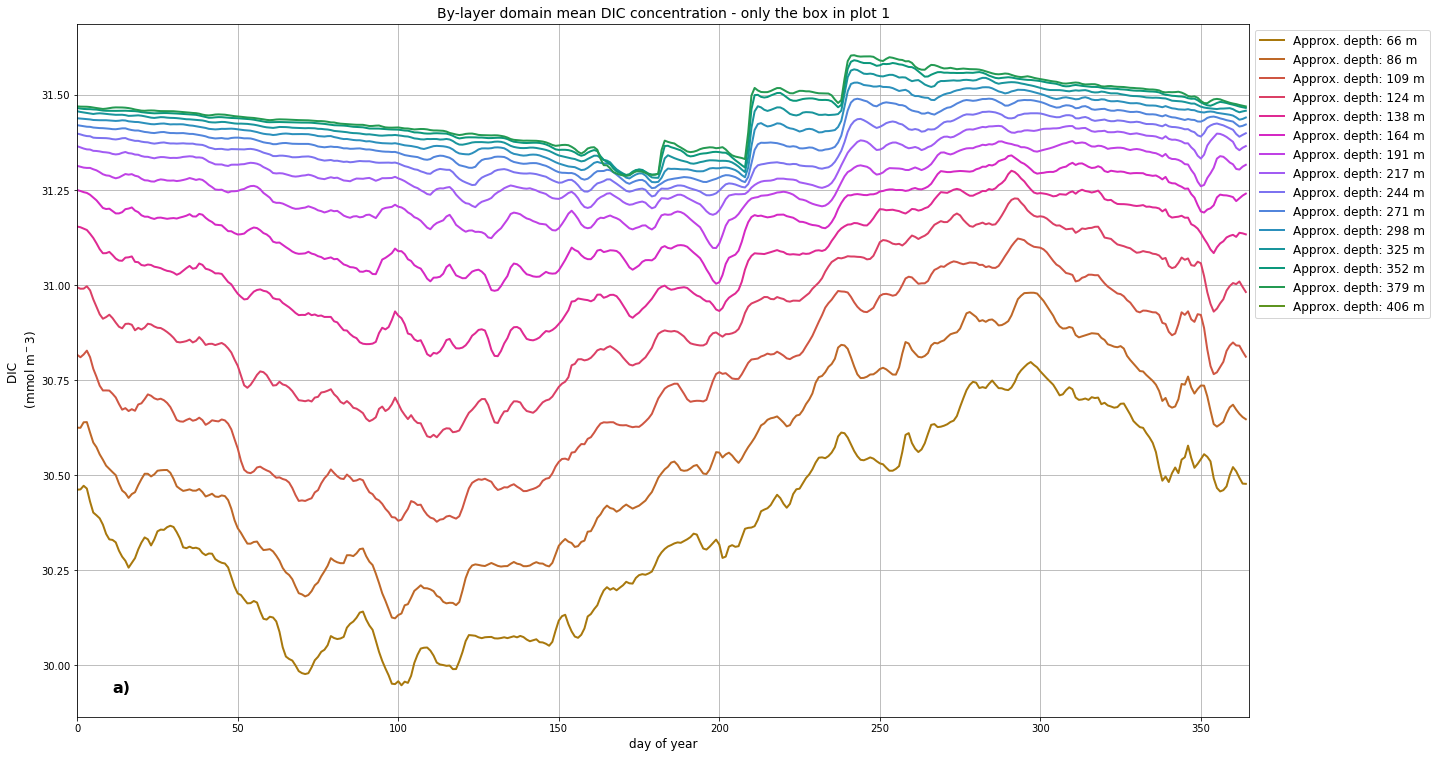

In [17]:
tmesh = nc.Dataset('//data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
fig = plt.figure(figsize=(14*fact, 8.5*fact))
depth = tmesh['e3t_0'][0,:,250,250]


ax1 = plt.subplot2grid((1,3), (0,0), colspan=3, rowspan=1)
tcm = cm.phase
for i in range(25,40):
    zdepth = np.sum(depth[0:i])
    if i%1 !=0: 
        ax1.plot(days_in,BR3_var_BOX[i,:],color = tcm(1.*(i-25)/16), linewidth = lw)
    if i%1 == 0:
        ax1.plot(days_in,BR3_var_BOX[i,:],color = tcm(1.*(i-25)/16),\
                label = 'Approx. depth: '+str(int(zdepth))+' m', linewidth = lw)
ax1.text(0.03, 0.03, 'a)', transform=ax1.transAxes, fontsize=16, fontweight='bold', va='bottom')
ax1.legend(bbox_to_anchor=[1.0,1.0], fontsize = fs)
plt.xlim([0,365*1])
plt.grid()
#ax1.set_xticks([])
ax1.set_xlabel('day of year', fontsize = fs)
ax1.set_ylabel('DIC \n (mmol m$^-3$)', fontsize = fs)
ax1.set_title('By-layer domain mean DIC concentration - only the box in plot 1', fontsize = ts)


#plt.tight_layout()

### WHAT DOES IT LOOK JUST AT that one black dot (one model point, y = 518, x = 238, depth = 428)

Text(0.5, 1.0, 'By-layer domain mean DIC concentration \n only the black dot in the first plot - one model pt')

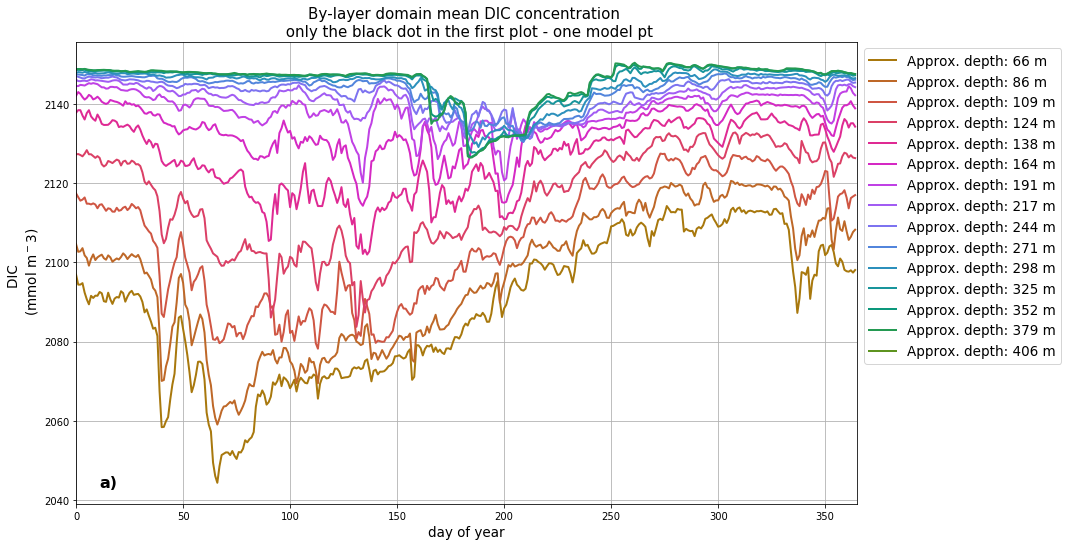

In [116]:
tmesh = nc.Dataset('//data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
fig = plt.figure(figsize=(14*fact, 8.5*fact))
depth = tmesh['e3t_0'][0,:,250,250]


ax1 = plt.subplot2grid((1,3), (0,0), colspan=3, rowspan=1)
tcm = cm.phase
for i in range(25,40):
    zdepth = np.sum(depth[0:i])
    if i%1 !=0: 
        ax1.plot(days_in,BR3_var_DS[i,:],color = tcm(1.*(i-25)/16), linewidth = lw)
    if i%1 == 0:
        ax1.plot(days_in,BR3_var_DS[i,:],color = tcm(1.*(i-25)/16),\
                label = 'Approx. depth: '+str(int(zdepth))+' m', linewidth = lw)
ax1.text(0.03, 0.03, 'a)', transform=ax1.transAxes, fontsize=16, fontweight='bold', va='bottom')
ax1.legend(bbox_to_anchor=[1.0,1.0], fontsize = fs)
plt.xlim([0,365*1])
plt.grid()
#ax1.set_xticks([])
ax1.set_xlabel('day of year', fontsize = fs)
ax1.set_ylabel('DIC \n (mmol m$^-3$)', fontsize = fs)
ax1.set_title('By-layer domain mean DIC concentration \n only the black dot in the first plot - one model pt', fontsize = ts)


#plt.tight_layout()

## WHAT PART OF DOMAIN IS STILL AROUND AT DEPTH LEVEL 30?

1.1363636363636362

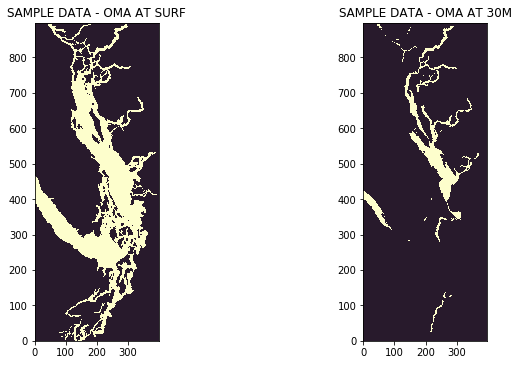

In [117]:
w = nc.Dataset('/data/tjarniko/results/hindcast.201905_dayavg_OmA-pH-pCO2/OmA_plus_20070104.nc')
OmA_30 = w['model_output']['OmA'][30,:,:]
OmA_surf = w['model_output']['OmA'][0,:,:]
depth = mesh['e3t_0'][0,:,250,250]

fact = 0.9
fig = plt.figure(figsize=(12*fact,6.5*fact))

ax0 = fig.add_subplot(1,2,1)
#toba and bute

im = ax0.pcolormesh(OmA_surf, cmap=cm.deep, vmin = 0, vmax = 800)
ax0.set_title('SAMPLE DATA - OMA AT SURF')
viz_tools.set_aspect(ax0)

ax2 = fig.add_subplot(1,2,2)

im = ax2.pcolormesh(OmA_30, cmap=cm.deep, vmin = 0, vmax = 800)
ax2.set_title('SAMPLE DATA - OMA AT 30M')
viz_tools.set_aspect(ax2)